In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [ ]:
df_full = pd.read_csv('/content/drive/MyDrive/complaints.csv.zip')
df_full.head()

<ipython-input-2-d8e7def5144f>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('/content/drive/MyDrive/complaints.csv.zip')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19145.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896026
1,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,19111.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896030
2,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,78725.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896035
3,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",NY,11233.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896060
4,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",OR,97219.0,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896096


In [ ]:
df_full['Product'].nunique()

18

In [ ]:
print('Shape of data',df_full.shape)

Shape of data (3583117, 18)


In [ ]:
# The idea is to demonstrate a workflow, so we will work with a smaller portion of the data

# First, we retain only the columns relevant to our present purpose

df=df_full[['Consumer complaint narrative','Product']]
print('Shape of data',df.shape)

Shape of data (3583117, 2)


In [ ]:
# Next, we get rid of nulls
print('Before dropping the nulls')
display('Null count', df.isna().sum())
print('Total rows of data', len(df))
df.dropna(inplace=True)
print('='*80)
print('After dropping the nulls')
display('Null count', df.isna().sum())
print('Total rows of data', len(df))

Before dropping the nulls


'Null count'

Consumer complaint narrative    2292368
Product                               0
dtype: int64

Total rows of data 3583117


<ipython-input-6-1010b9478bc2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


After dropping the nulls


'Null count'

Consumer complaint narrative    0
Product                         0
dtype: int64

Total rows of data 1290749


In [ ]:
df=df.head(1000).reset_index(drop=True)
display(df.head())
display(df.tail())

,Consumer complaint narrative,Product
0,IDENTITY THEFT XX/XX/XXXXXXXX XXXX XXXX XXXX X...,"Credit reporting, credit repair services, or o..."
1,"In XX/XX/2023, I received a letter from Citi, ...",Checking or savings account
2,My minimum payment for my Fortiva Retail Credi...,Credit card or prepaid card
3,Wells Fargo transferred servicing of my loan t...,Mortgage
4,"My name is XXXX XXXX, this complaint is not ma...","Credit reporting, credit repair services, or o..."


,Consumer complaint narrative,Product
995,Experian continues to violate my consumer righ...,"Credit reporting, credit repair services, or o..."
996,Delete fraud alerts from all 3 credit bureaus ...,"Credit reporting, credit repair services, or o..."
997,I was in the process of applying for new emplo...,"Credit reporting, credit repair services, or o..."
998,The defective product was returned to XXXX. Wi...,Debt collection
999,I have contacted NewRez multiple times and my ...,Mortgage


In [ ]:
print('Shape of data',df.shape)

Shape of data (1000, 2)


In [ ]:
df.tail()

,Consumer complaint narrative,Product
995,Experian continues to violate my consumer righ...,"Credit reporting, credit repair services, or o..."
996,Delete fraud alerts from all 3 credit bureaus ...,"Credit reporting, credit repair services, or o..."
997,I was in the process of applying for new emplo...,"Credit reporting, credit repair services, or o..."
998,The defective product was returned to XXXX. Wi...,Debt collection
999,I have contacted NewRez multiple times and my ...,Mortgage


In [ ]:
# Kinds of products on which complaints are generated
df['Product'].nunique()

9

**Typical Complaint**

In [ ]:
df['Consumer complaint narrative'][0]

'IDENTITY THEFT XX/XX/XXXXXXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX  XXXX, Florida XXXX Experian XXXX XXXX XXXX XXXX, TX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, PA XXXX RE : LAST 4 OF SOCIAL SECURITY NUMBER # XXXX To Whom It May Concern, This notice is to inform you that you unlawfully reported fraudulent accounts that arose from IDENTITY THEFT that you did not verify as required by law on my consumer report.\n\n15 USC sS 1681 b ( c ) Furnishing reports in connection with credit or insurance transactions that are not initiated by the consumer ( 3 ) Information regarding inquiries ; Except as provided in section 1681g ( a ) ( 5 ) of this title ; a consumer reporting agency shall not furnish to any person a record of inquires in connection with a credit or insurance transaction that is not initiated by a consumer.\n\nThe following Inquires are a result of Identity theft 

**Categories of products -
 the classes for which we will predict**


In [ ]:
list(df.Product.unique())

['Credit reporting, credit repair services, or other personal consumer reports',
 'Checking or savings account',
 'Credit card or prepaid card',
 'Mortgage',
 'Debt collection',
 'Vehicle loan or lease',
 'Payday loan, title loan, or personal loan',
 'Money transfer, virtual currency, or money service',
 'Student loan']

In [ ]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    615
Checking or savings account                                                     102
Debt collection                                                                  96
Credit card or prepaid card                                                      88
Mortgage                                                                         47
Vehicle loan or lease                                                            21
Money transfer, virtual currency, or money service                               16
Payday loan, title loan, or personal loan                                        10
Student loan                                                                      5
Name: Product, dtype: int64

**Train-test split**

25% of the total data is used as    validation data while the remaining as training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                            df['Consumer complaint narrative'], df['Product'],
                                            test_size=0.25, random_state=0, stratify=df['Product'])
print(f'Training utterances: {len(X_train)} of shape {X_train.shape}')
print(f'Validation utterances: {len(X_test)} of shape {X_test.shape}')

# NOTE: The features occupy a single column

Training utterances: 750 of shape (750,)
Validation utterances: 250 of shape (250,)


In [ ]:
display(y_train.value_counts())

Credit reporting, credit repair services, or other personal consumer reports    461
Checking or savings account                                                      76
Debt collection                                                                  72
Credit card or prepaid card                                                      66
Mortgage                                                                         35
Vehicle loan or lease                                                            16
Money transfer, virtual currency, or money service                               12
Payday loan, title loan, or personal loan                                         8
Student loan                                                                      4
Name: Product, dtype: int64

In [ ]:
display(y_test.value_counts())

Credit reporting, credit repair services, or other personal consumer reports    154
Checking or savings account                                                      26
Debt collection                                                                  24
Credit card or prepaid card                                                      22
Mortgage                                                                         12
Vehicle loan or lease                                                             5
Money transfer, virtual currency, or money service                                4
Payday loan, title loan, or personal loan                                         2
Student loan                                                                      1
Name: Product, dtype: int64

**Calculating tf-idf scores**

Calculating tf-idf scores for each unique token in the dataset and creating frequency chart for each utterance in the dataset

In [ ]:
# instantiate the vectorizer object
vectorizer = TfidfVectorizer(stop_words= 'english')
# convert the documents into a matrix
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)
X_train_vec, X_test_vec

(<750x5428 sparse matrix of type '<class 'numpy.float64'>'
 	with 43834 stored elements in Compressed Sparse Row format>,
 <250x5428 sparse matrix of type '<class 'numpy.float64'>'
 	with 13749 stored elements in Compressed Sparse Row format>)

**Feature Selection**

**SelectKBest**

Select features according to the k highest scores.

**Chi-square test**

measure dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

n_features=100

ch2 = SelectKBest(chi2, k=n_features)
X_train_sp = ch2.fit_transform(X_train_vec, y_train)
X_test_sp  = ch2.transform(X_test_vec)

X_train_sp, X_test_sp

(<750x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 2363 stored elements in Compressed Sparse Row format>,
 <250x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 768 stored elements in Compressed Sparse Row format>)

In [ ]:
# Converting the sparse matrix to a dense one to visualize it.

cols = list(range(n_features))

X_train_dense = pd.DataFrame(data=X_train_sp.toarray(), columns=cols)
X_test_dense  = pd.DataFrame(data=X_test_sp.toarray(), columns=cols)
print(X_train_dense.shape, X_test_dense.shape)
X_train_dense

(750, 100) (250, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036739
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411653
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.863230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211266
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909339
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054744


In [ ]:
# Now we have train and test data as vectors
# Let us also convert the target data appropriately


encoder = LabelEncoder()
y_train_num  = encoder.fit_transform(y_train)
y_test_num   = encoder.transform(y_test)
y_train_num.min(), y_train_num.max(), y_test_num.min(), y_test_num.max() # sanity check

(0, 8, 0, 8)

In [ ]:
# What does the target look like, after encoding. Check out the first n datapoints
n=5
print('Text   Encoding')
print('-'*50)
for p,q in zip(y_train[:n].values,y_train_num):
    print(f'{q}      {p}')

Text   Encoding
--------------------------------------------------
2      Credit reporting, credit repair services, or other personal consumer reports
0      Checking or savings account
2      Credit reporting, credit repair services, or other personal consumer reports
1      Credit card or prepaid card
2      Credit reporting, credit repair services, or other personal consumer reports


In [ ]:
# Now, if you are fussy and want to see exactly what kind of encoding has happened.
mapping = {l: i for i, l in enumerate(encoder.classes_)}
mapping

{'Checking or savings account': 0,
 'Credit card or prepaid card': 1,
 'Credit reporting, credit repair services, or other personal consumer reports': 2,
 'Debt collection': 3,
 'Money transfer, virtual currency, or money service': 4,
 'Mortgage': 5,
 'Payday loan, title loan, or personal loan': 6,
 'Student loan': 7,
 'Vehicle loan or lease': 8}

**Our data is ready for modelling**


We want to train a model such that looking at the complaint text, it should be able to determine which category of complaint it deals with.

In [ ]:
rf_model  = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs = -1)
scores = cross_val_score(rf_model,
                         X_train_dense,
                         y_train_num,
                         cv=5,
                         n_jobs = -1,
                         scoring = 'accuracy')
scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.7693333333333333

In [ ]:
rf_model.fit(X_train_dense, y_train_num)
preds=rf_model.predict(X_test_dense)
print('Predictions ready')

Predictions ready


In [ ]:
# What does a prediction look like - let's take the first one
preds[0]

1

In [ ]:
# Let's revert back to the categories we understand
preds=encoder.inverse_transform(preds)
preds[0]

'Credit card or prepaid card'

**Let's Looks At The Prediction We Made**

In [ ]:
report = pd.DataFrame(columns=['Complaint','Actual Product','Prediction'])
report['Complaint']      = X_test
report['Actual Product'] = y_test
report['Prediction']     = preds
report

,Complaint,Actual Product,Prediction
2,My minimum payment for my Fortiva Retail Credi...,Credit card or prepaid card,Credit card or prepaid card
281,ON XX/XX/22 for the amount of {$380.00} XXXX X...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."
558,I went to the XXXX XXXX XXXXXXXX in 2010. At t...,"Credit reporting, credit repair services, or o...",Mortgage
22,I have attached an FTC report with fraudulent ...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."
103,"Since XX/XX/XXXX, I have pursued Citibank , N....",Checking or savings account,Checking or savings account
...,...,...,...
990,Experian is in violation of the FCRA for repor...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."
621,Bank of America XX/XX/2023 An account was open...,Checking or savings account,Checking or savings account
227,I submitted a letter to the 3 Credit Bureaus t...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."
8,Attached you will find detailed dispute docs d...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."


**Accuracy of Model**

In [ ]:
## How accurate is this model?
report['Correct'] = (report['Actual Product'] == report['Prediction']).astype('int')
display(report)
print(f'Accuracy: {100*report.Correct.sum()/report.Correct.count()} %')

,Complaint,Actual Product,Prediction,Correct
2,My minimum payment for my Fortiva Retail Credi...,Credit card or prepaid card,Credit card or prepaid card,1
281,ON XX/XX/22 for the amount of {$380.00} XXXX X...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1
558,I went to the XXXX XXXX XXXXXXXX in 2010. At t...,"Credit reporting, credit repair services, or o...",Mortgage,0
22,I have attached an FTC report with fraudulent ...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1
103,"Since XX/XX/XXXX, I have pursued Citibank , N....",Checking or savings account,Checking or savings account,1
...,...,...,...,...
990,Experian is in violation of the FCRA for repor...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1
621,Bank of America XX/XX/2023 An account was open...,Checking or savings account,Checking or savings account,1
227,I submitted a letter to the 3 Credit Bureaus t...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1
8,Attached you will find detailed dispute docs d...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1


Accuracy: 71.2 %


In [ ]:
# Another way to crunch numbers
r = pd.DataFrame()
r['Correctly Predicted'] = report.groupby('Actual Product').sum()['Correct']
r['Overall Predicted']   = report.groupby('Prediction').count()['Correct']
r['Actuals']             = report.groupby('Actual Product').count()['Correct']
r


<ipython-input-32-579953980ebf>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r['Correctly Predicted'] = report.groupby('Actual Product').sum()['Correct']


,Correctly Predicted,Overall Predicted,Actuals
Actual Product,,,
Checking or savings account,15,28.0,26
Credit card or prepaid card,10,21.0,22
"Credit reporting, credit repair services, or other personal consumer reports",137,171.0,154
Debt collection,9,17.0,24
"Money transfer, virtual currency, or money service",0,NaN,4
Mortgage,7,11.0,12
"Payday loan, title loan, or personal loan",0,NaN,2
Student loan,0,NaN,1
Vehicle loan or lease,0,2.0,5


In [ ]:
# Or you could do it in a more mundane way
print(rf_model.score(X_test_dense, y_test_num))

0.712


**Let's Look At Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,labels,size=10, rotate_labels=False):
    '''
    This function receives a confusion matrix object and plots it out using seaborn
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    font_specs = {"size": 20, 'fontweight':'bold'}
    title_specs= {"size": 16, 'fontweight':'bold'}
    figsize = size
    fig, ax = plt.subplots(figsize = (figsize,figsize), facecolor = '#ebebeb', frameon = True, edgecolor = 'black')
    ax = sns.heatmap(cm,annot=True, cbar = False, cmap = 'Blues',linewidths=5,
                  linecolor='#ebebeb', annot_kws=font_specs, fmt='g')
    plt.xlabel('Predicted', fontdict = font_specs, labelpad=-(figsize*65))
    plt.ylabel('Actual', fontdict = font_specs, labelpad=15)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    if rotate_labels:
        ax.set_xticklabels(labels, rotation=90, ha='center')
        ax.set_yticklabels(labels, rotation=0, ha='right')

    ax.tick_params(labelbottom=False, labeltop=True, labelsize = 12, colors ='#151736' )
    plt.title('CONFUSION MATRIX',loc = 'right', pad = figsize*4 , fontdict = title_specs)
    plt.show()
print('custom function defined')

custom function defined


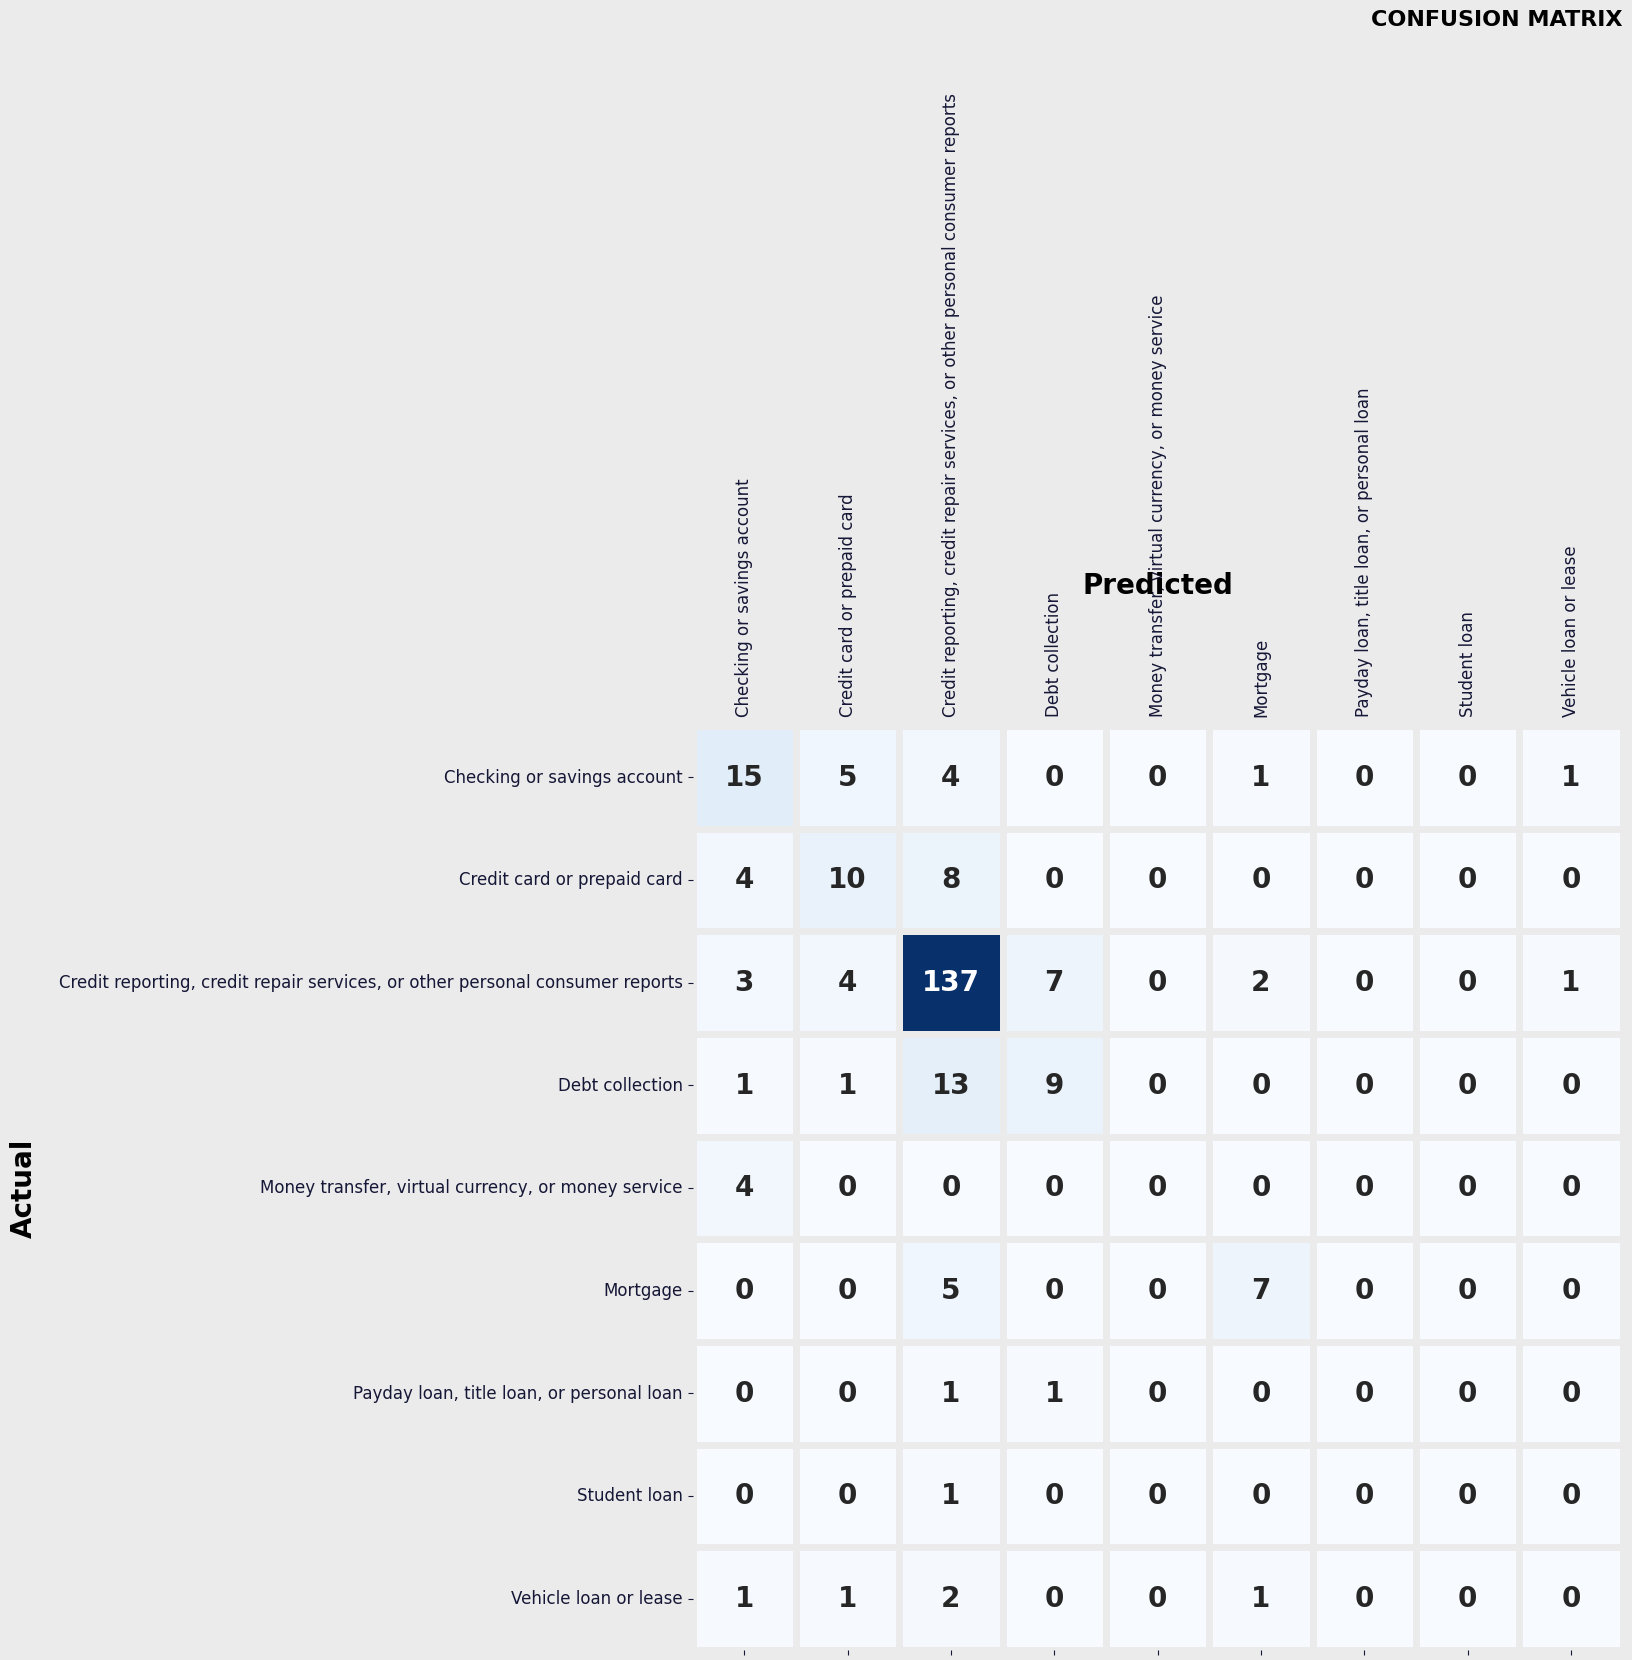

In [ ]:
cm = confusion_matrix(y_test, preds, labels=encoder.classes_)
plot_confusion_matrix(cm=cm,labels=encoder.classes_, size=12, rotate_labels=True)